In [1]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def g5std(rep):
    for i in range(5):
            qml.Hadamard(wires=i)
    for _ in range(rep):
        # Oracle

        qml.MultiControlledX(wires=[0, 1, 5])
        qml.MultiControlledX(wires=[2, 3, 6])
        qml.MultiControlledX(wires=[5, 6, 7])
        # qml.MultiControlledX(wires=[4, 7, 8])
        qml.CZ(wires=[7, 4])
        qml.MultiControlledX(wires=[5, 6, 7])
        qml.MultiControlledX(wires=[2, 3, 6])
        qml.MultiControlledX(wires=[0, 1, 5])

        # Diffusion
        for i in range(5):
            qml.Hadamard(wires=i)
        for i in range(5):
            qml.X(wires=i)
        qml.MultiControlledX(wires=[0, 1, 5], work_wires=8)
        qml.MultiControlledX(wires=[2, 3, 6], work_wires=8)
        qml.MultiControlledX(wires=[5, 6, 7], work_wires=8)
        # qml.MultiControlledX(wires=[4, 7, 8])
        qml.CZ(wires=[7, 4])
        qml.MultiControlledX(wires=[5, 6, 7], work_wires=8)
        qml.MultiControlledX(wires=[2, 3, 6], work_wires=8)
        qml.MultiControlledX(wires=[0, 1, 5], work_wires=8)
        for i in range(5):
            qml.X(wires=i)
        for i in range(5):
            qml.Hadamard(wires=i)

    return qml.probs(wires=range(5))




(<Figure size 7600x900 with 1 Axes>, <Axes: >)

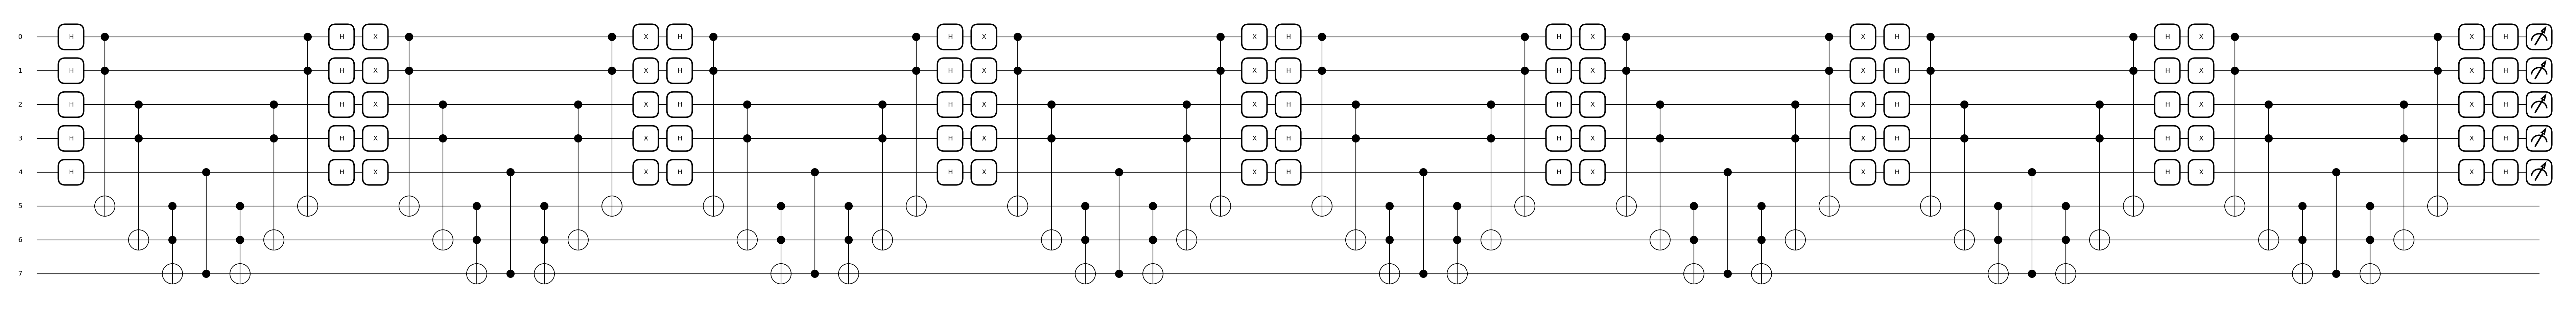

In [3]:
qml.draw_mpl(g5std)(rep=4)

In [4]:
def g52wqc():
  # qc=QuantumCircuit(11)
  for _ in range(5):
        qml.Hadamard(wires=_)
  qml.MultiControlledX(wires=[0,1,5])
  qml.MultiControlledX(wires=[2,3,6])
  qml.MultiControlledX(wires=[5,6,7])
  qml.MultiControlledX(wires=[4,7,8])
  qml.MultiControlledX(wires=[5,6,7])
  qml.MultiControlledX(wires=[2,3,6])
  qml.MultiControlledX(wires=[0,1,5])





  return qml.density_matrix(wires=[0,1,2,3,4,8])

(<Figure size 1100x1000 with 1 Axes>, <Axes: >)

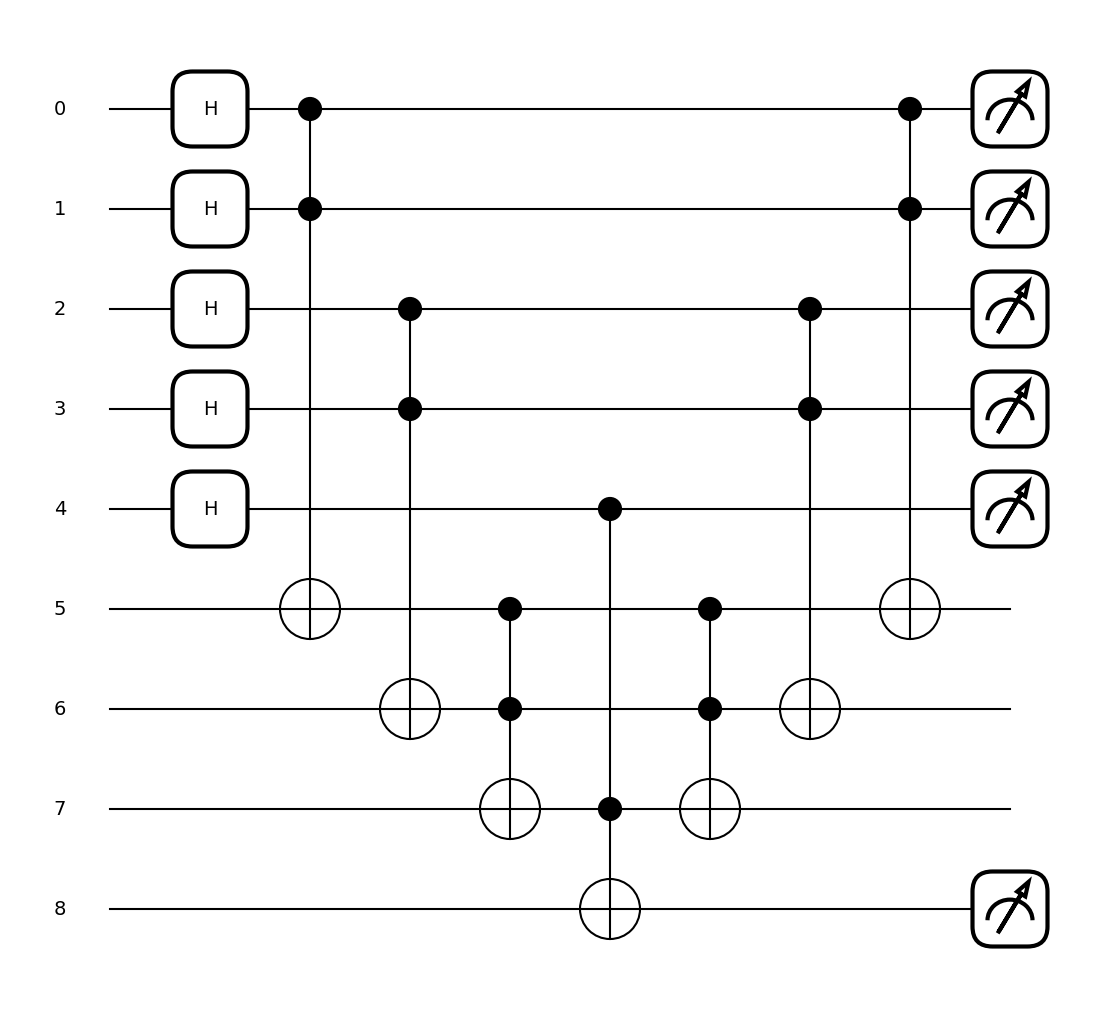

In [5]:
#scheme of circuit
qml.draw_mpl(g52wqc)()

In [6]:
def g62wqc():
  # qc=QuantumCircuit(11)
  for _ in range(6):
        qml.Hadamard(wires=_)
  qml.MultiControlledX(wires=[0,1,6])
  qml.MultiControlledX(wires=[2,3,7])
  qml.MultiControlledX(wires=[6,7,8])
  qml.MultiControlledX(wires=[4,8,9])

  qml.MultiControlledX(wires=[5,9,10])

  qml.MultiControlledX(wires=[4,8,9])
  qml.MultiControlledX(wires=[6,7,8])
  qml.MultiControlledX(wires=[2,3,7])
  qml.MultiControlledX(wires=[0,1,6])

  return qml.density_matrix(wires=[0,1,2,3,4,5,10])

(<Figure size 1300x1200 with 1 Axes>, <Axes: >)

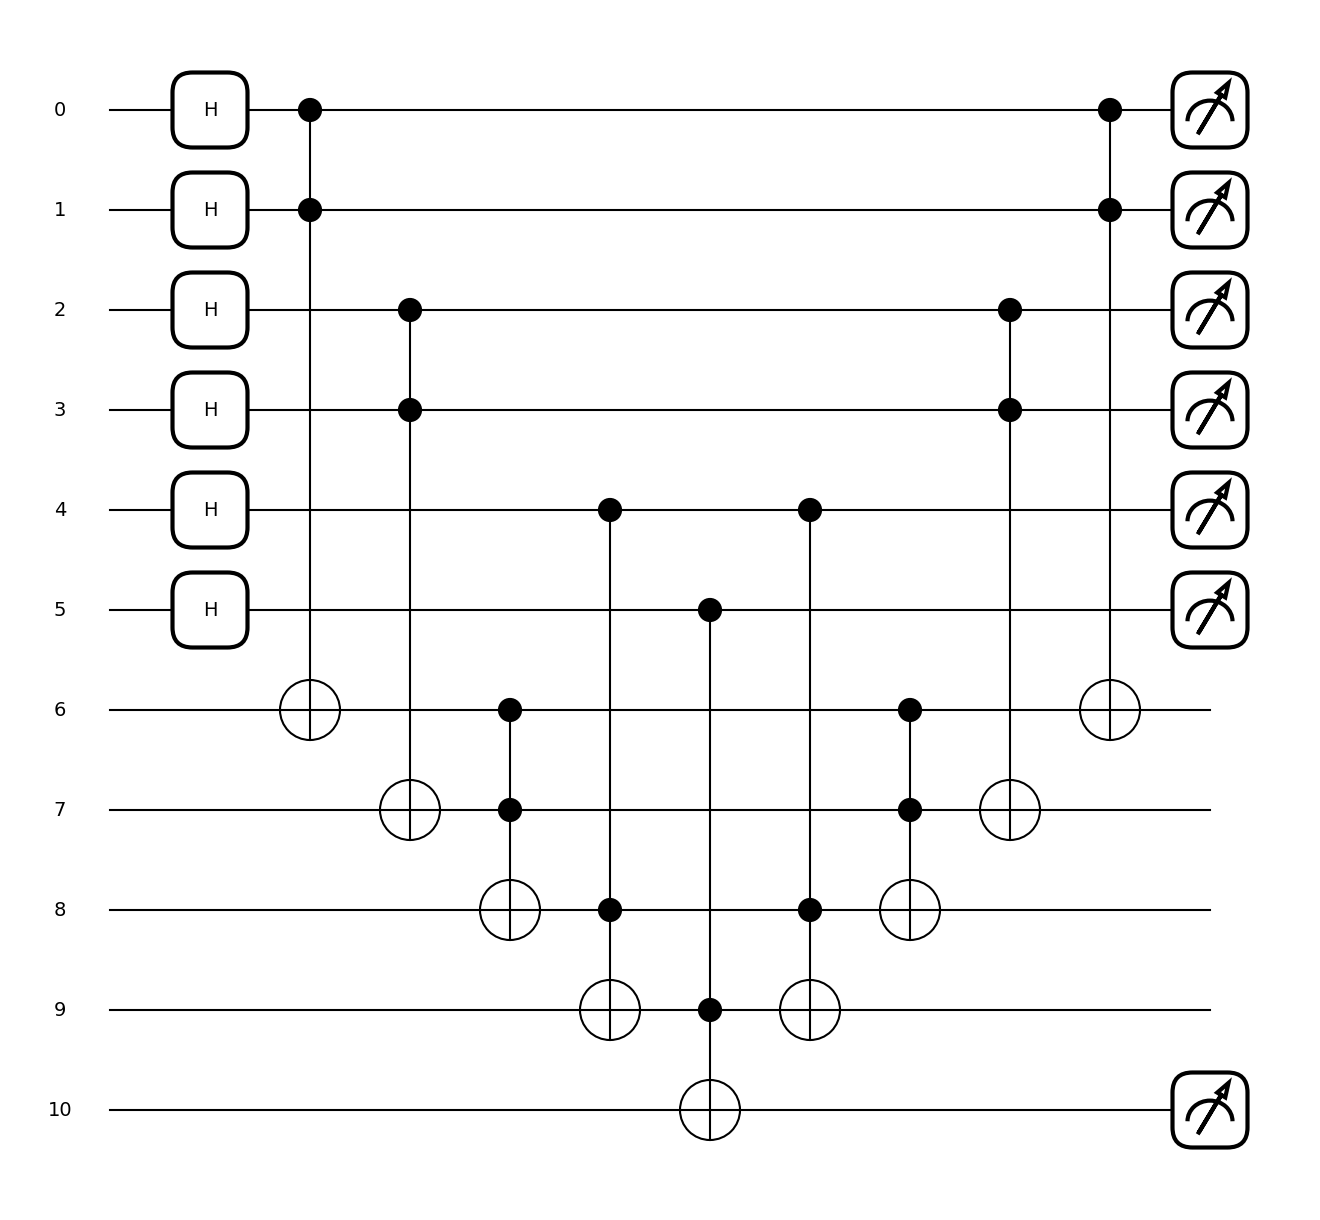

In [7]:
#scheme of circuit
qml.draw_mpl(g62wqc)()

In [8]:
def g6std(rep):
    for _ in range(6):
        qml.Hadamard(wires=_)
    
    for _ in range(rep):  
        # Oracle
        qml.MultiControlledX(wires=[0, 1, 6])
        qml.MultiControlledX(wires=[2, 3, 7])
        qml.MultiControlledX(wires=[6, 7, 8])
        qml.MultiControlledX(wires=[4, 8, 9])
        qml.CZ(wires=[9, 5])
        qml.MultiControlledX(wires=[4, 8, 9])
        qml.MultiControlledX(wires=[6, 7, 8])
        qml.MultiControlledX(wires=[2, 3, 7])
        qml.MultiControlledX(wires=[0, 1, 6])

        # Diffusion
        for _ in range(6):
            qml.Hadamard(wires=_)
        for _ in range(6):
            qml.X(wires=_)
        qml.MultiControlledX(wires=[0, 1, 6], work_wires=10)
        qml.MultiControlledX(wires=[2, 3, 7], work_wires=10)
        qml.MultiControlledX(wires=[6, 7, 8], work_wires=10)
        qml.MultiControlledX(wires=[4, 8, 9], work_wires=10)
        qml.CZ(wires=[5, 9])
        qml.MultiControlledX(wires=[4, 8, 9], work_wires=10)
        qml.MultiControlledX(wires=[6, 7, 8], work_wires=10)
        qml.MultiControlledX(wires=[2, 3, 7], work_wires=10)
        qml.MultiControlledX(wires=[0, 1, 6], work_wires=10)
        for _ in range(6):
            qml.X(wires=_)
        for _ in range(6):
            qml.Hadamard(wires=_)

    return qml.probs(wires=range(6))


(<Figure size 13600x1100 with 1 Axes>, <Axes: >)

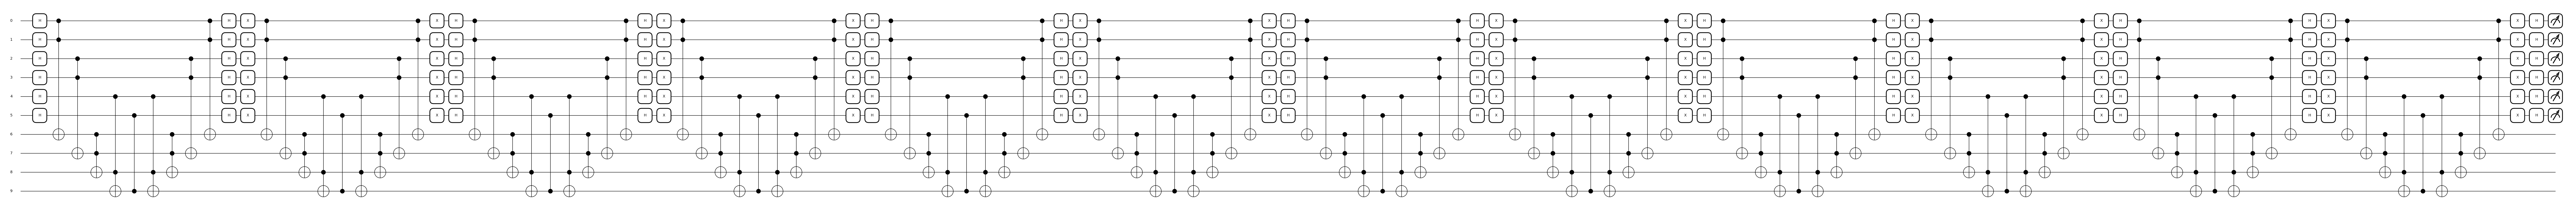

In [9]:
qml.draw_mpl(g6std)(rep=6)

In [10]:
# description of noise by type of gate and strength

#noise_gate = qml.BitFlip
# noise_gate = qml.PhaseFlip
# noise_gate = qml.PhaseDamping
noise_gate = qml.DepolarizingChannel
noise_strength = 0.1
noise = np.linspace(0,1,50)

In [11]:
def sucprob5_2wqc(noise_gate, noise_strength):
    dev_ideal = qml.device("default.mixed", wires=9)
    dev_noisy = qml.transforms.insert(dev_ideal, noise_gate, noise_strength)
    circ = qml.QNode(g52wqc, dev_noisy)
    full_state = circ()

    eps=1e-5

    op = np.kron(np.eye(32),[[eps,1-eps]])

    reduced_state = op.dot(full_state).dot(op.conj().T)
    reduced_state = reduced_state/reduced_state.trace()

    diagonal = reduced_state.diagonal()

    non_zero_indices = [i for i, val in enumerate(diagonal) if not np.isclose(val, 0)]

    non_zero_values = diagonal[non_zero_indices]
    max_value = np.max(non_zero_values)
    max_index = non_zero_indices[np.argmax(non_zero_values)]

    #print("Non-zero indices:", non_zero_indices)
    #print("Non-zero values:", non_zero_values)
    print("Maximum non-zero value:", max_value)
    print("Index of maximum non-zero value:", max_index)

    return np.real_if_close(diagonal[31])

In [12]:
prob5_2wqc = [sucprob5_2wqc(noise_gate=noise_gate, noise_strength=n) for n in noise]


Maximum non-zero value: (0.999999996898718+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.5119423275767804+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.3156841643964367+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.21504882560445096+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.15665649231384263+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.12013736310299368+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.09611412062653517+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.07971972144998789+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.0682096591665201+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.05994013123731905+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.05388080076570085+0j)
Index of maximum non-zero value: 31
Maximum non-zero value: (0.04936267997304354+0j)
Index of maximum non-

In [13]:
def sucprob6_2wqc(noise_gate,noise_strength):
  dev_ideal = qml.device("default.mixed", wires=11)
  dev_noisy = qml.transforms.insert(dev_ideal, noise_gate, noise_strength)

  circ = qml.QNode(g62wqc, dev_noisy)
  full_state = circ()
  eps= 1e-5

  op = np.kron(np.eye(64),[[eps,1-eps]])

  reduced_state = op.dot(full_state).dot(op.conj().T)
  reduced_state = reduced_state/reduced_state.trace()
  diagonal = reduced_state.diagonal()

  non_zero_indices = [i for i, val in enumerate(diagonal) if not np.isclose(val, 0)]

  non_zero_values = diagonal[non_zero_indices]
  max_value = np.max(non_zero_values)
  max_index = non_zero_indices[np.argmax(non_zero_values)]

    
  print("Maximum non-zero value:", max_value)
  print("Index of maximum non-zero value:", max_index)

  return np.real_if_close(diagonal[63])

In [14]:
prob6_2wqc = [sucprob6_2wqc(noise_gate=noise_gate, noise_strength=n) for n in noise]


Maximum non-zero value: (0.999999993697354+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.3282617201914499+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.1724255846634971+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.10795048004113857+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.07493873181031081+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.05600970807229431+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.04435050547286615+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.0367952349903964+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.031702897132045674+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.028156219925594136+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.025613593253114623+0j)
Index of maximum non-zero value: 63
Maximum non-zero value: (0.023741721665881045+0j)
Index of maximum 

In [15]:
def sucprob5_std(repetitions, noise_gate, noise_strength):

    dev_ideal = qml.device("default.mixed", wires=9)
    dev_noisy = qml.transforms.insert(dev_ideal, noise_gate, noise_strength)
    circ = qml.QNode(g5std, dev_noisy)
    full_state = circ(repetitions)
    print("Dimensions of full_state:", full_state.shape)


    max_value = np.max(full_state)
    max_index = np.argmax(full_state)

    print("Largest value in full_state:", max_value)
    print("Index of largest value:", max_index)

    return full_state[31]


    

    

In [16]:
prob5_std = [sucprob5_std(repetitions=4, noise_gate=noise_gate, noise_strength=_) for _ in noise]

Dimensions of full_state: (32,)
Largest value in full_state: 0.9991823155477293
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.0700411147281192
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.036211954622191664
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.03243267562831854
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.0315775637444594
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.031342393967439125
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.03127563896440774
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.031256912058938685
Index of largest value: 31
Dimensions of full_state: (32,)
Largest value in full_state: 0.031251801862647983
Index of largest value: 30
Dimensions of full_state: (

In [17]:
def sucprob6_std(repetitions,noise_gate,noise_strength):
  dev_ideal = qml.device("default.mixed", wires=11)
  dev_noisy = qml.transforms.insert(dev_ideal, noise_gate, noise_strength)

  circ = qml.QNode(g6std, dev_noisy)
  full_state = circ(repetitions)
  #print(np.shape(full_state))
  #print(np.real_if_close(full_state[1008]))
  print("Dimensions of full_state:", full_state.shape)
  max_value = np.max(full_state)
  max_index = np.argmax(full_state)
  print("Largest value in full_state:", max_value)
  print("Index of largest value:", max_index)
    
  return full_state[63]


In [18]:
prob6_std = [sucprob6_std(repetitions=6, noise_gate=noise_gate, noise_strength=_) for _ in noise]

Dimensions of full_state: (64,)
Largest value in full_state: 0.996585680795425
Index of largest value: 63
Dimensions of full_state: (64,)
Largest value in full_state: 0.022469600494561037
Index of largest value: 63
Dimensions of full_state: (64,)
Largest value in full_state: 0.016337880716470046
Index of largest value: 63
Dimensions of full_state: (64,)
Largest value in full_state: 0.015741100090191085
Index of largest value: 63
Dimensions of full_state: (64,)
Largest value in full_state: 0.015644168304616186
Index of largest value: 63
Dimensions of full_state: (64,)
Largest value in full_state: 0.015628086105219346
Index of largest value: 62
Dimensions of full_state: (64,)
Largest value in full_state: 0.01562548550926289
Index of largest value: 62
Dimensions of full_state: (64,)
Largest value in full_state: 0.015625072047498287
Index of largest value: 62
Dimensions of full_state: (64,)
Largest value in full_state: 0.015625010073006415
Index of largest value: 62
Dimensions of full_stat

Text(0, 0.5, 'Success probability')

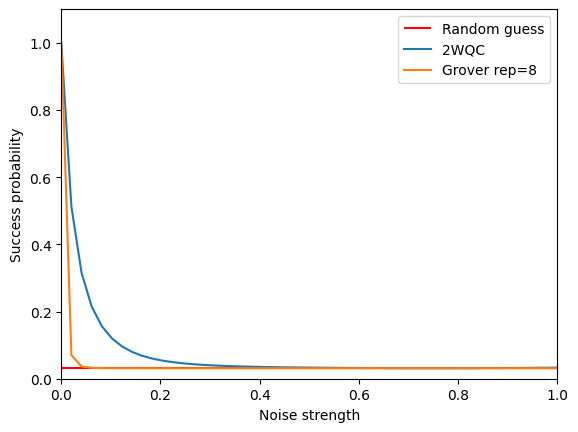

In [19]:
plt.hlines(1/32,0,1, color='red', label='Random guess')
plt.plot(noise, prob5_2wqc, '-', label='2WQC')
plt.plot(noise, prob5_std , '-', label='Grover rep=8')

plt.ylim(0,1.1)
plt.xlim(0,1)
plt.legend()
plt.xlabel('Noise strength')
plt.ylabel('Success probability')

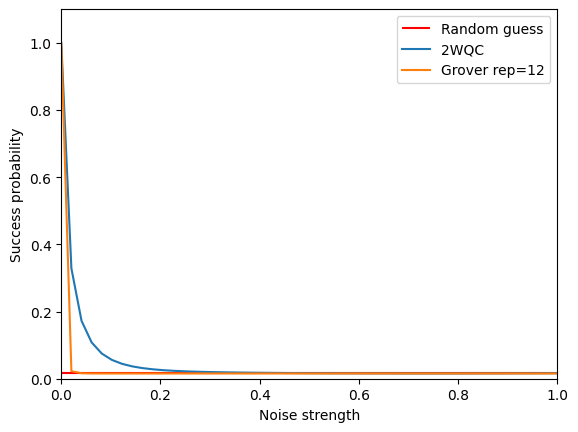

In [20]:
plt.hlines(1/64, 0, 1, color='red', label='Random guess')
plt.plot(noise, prob6_2wqc, '-', label='2WQC')
plt.plot(noise, prob6_std, '-', label='Grover rep=12')

plt.ylim(0, 1.1)
plt.xlim(0, 1)
plt.legend()
plt.xlabel('Noise strength')
plt.ylabel('Success probability')
plt.show()


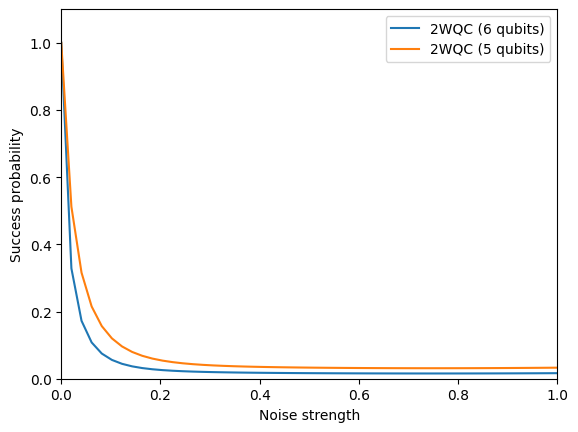

In [24]:

plt.plot(noise, prob6_2wqc, '-', label='2WQC (6 qubits)')

plt.plot(noise, prob5_2wqc, '-', label='2WQC (5 qubits)')

plt.ylim(0, 1.1)
plt.xlim(0, 1)

plt.legend()
plt.xlabel('Noise strength')
plt.ylabel('Success probability')


plt.show()